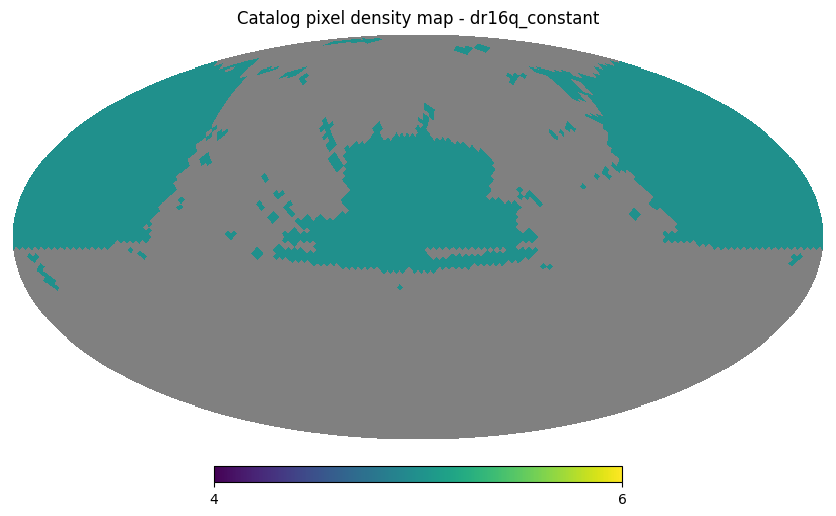

In [54]:
from hipscat.pixel_tree.pixel_alignment import align_trees
from hipscat.pixel_tree.pixel_tree import PixelTree
import numpy as np
from hipscat.catalog import Catalog
from hipscat import inspection

agn_path="/data3/epyc/data3/hipscat/catalogs/dr16q_constant/"
agn_catalog = Catalog.read_from_hipscat(agn_path)

inspection.plot_pixels(agn_catalog)
# full_alignment

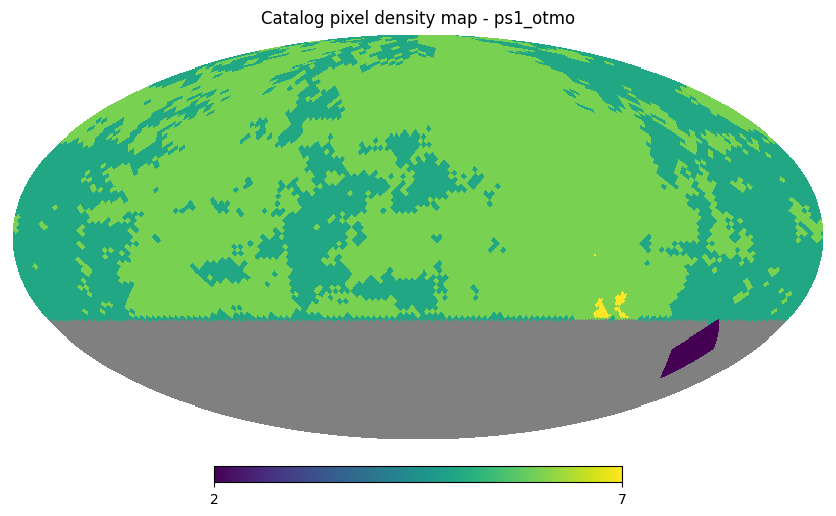

In [48]:
sdss_path="/data3/epyc/data3/hipscat/catalogs/ps1/ps1_otmo"
sdss_catalog = Catalog.read_from_hipscat(sdss_path)

inspection.plot_pixels(sdss_catalog)

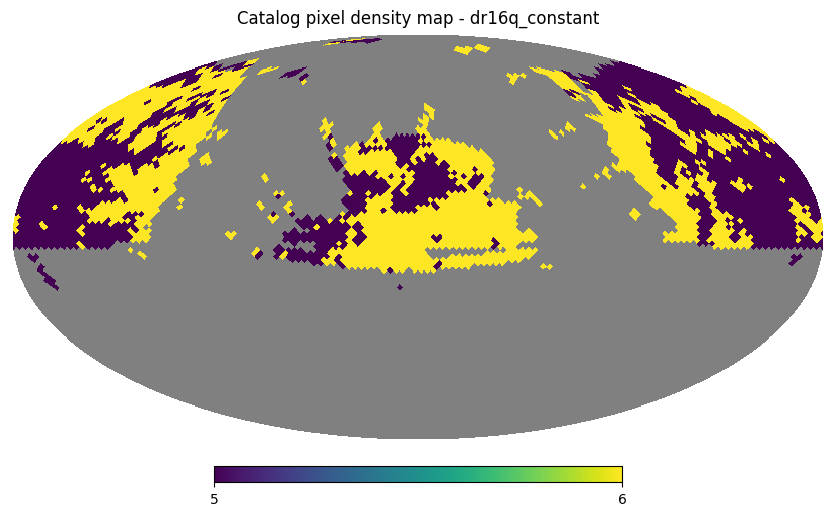

In [55]:
alignment = align_trees(sdss_catalog.pixel_tree, agn_catalog.pixel_tree)
aligned_catalog = Catalog(agn_catalog.catalog_info, alignment.pixel_tree)

inspection.plot_pixels(aligned_catalog)

In [56]:
## Num row changes

just_joined = alignment.pixel_mapping[["primary_Norder", "primary_Npix"]]
just_joined = just_joined.drop_duplicates().rename(columns={"primary_Norder":"Norder", "primary_Npix":"Npix"}).set_index(["Norder", "Npix"])

total_rows = sdss_catalog.catalog_info.total_rows
sdss_tiles = sdss_catalog.get_pixels()
total_tiles = len(sdss_tiles)

sdss_tiles = sdss_tiles.set_index(["Norder", "Npix"])
joined_data = sdss_tiles.merge(just_joined, how="inner", left_index=True, right_index=True)

In [57]:
from tabulate import tabulate

table = [["Partitions",total_tiles,len(joined_data), len(joined_data)/total_tiles*100],
         ["Rows",total_rows,f"{joined_data['num_rows'].sum()}", joined_data['num_rows'].sum()/total_rows*100]]
print(tabulate(table, headers=["measure", "full catalog", "aligned", "align percent"],
              colalign=("left", "right", "right")))

measure       full catalog     aligned    align percent
----------  --------------  ----------  ---------------
Partitions           27161        9291          34.2071
Rows           10560724292  3751804825          35.526
